# Purpose

The purpose of this project is to demonstrate the ability to analyze data with python.  This project will encompass data analysis of a list of movies, ratings, and demographic information.  The primary focus for this project is using multiple tables and data analysis.<br>

**What to expect form this project:**<br>
Loading data from multiple data sources<br>
Checking for missing values<br>
Transforming data<br>
Data visualization<br>
Merging different data tables together<br>
Ending with some questions my instructor asked

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import itertools

### Loading and getting familiar with the data sets

In [2]:
print(open('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\ml-100k\\u.item.csv'))

<_io.TextIOWrapper name='C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\ml-100k\\u.item.csv' mode='r' encoding='cp1252'>


In [3]:
df1 = pd.read_csv('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\ml-100k\\u.data', sep='\t',
                names=['user_id', 'item_id', 'rating', 'timestamp'])
df2 = pd.read_csv('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\ml-100k\\u.item.csv', sep='|',
                names=['movie_id', 'movie_title', 'release_date', 'video_release_date','IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
                       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi','Thriller', 'War', 'Western'],
                 encoding='latin-1')
df3 = pd.read_csv('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\ml-100k\\u.user', sep='|',
                 names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

In [4]:
df1.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df2.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df3.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Examining the dataframes for missing values

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  FilmNoir            1682 non-null   int64  
 16  Horror

**Some Null values in df2**

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


### Creating a year column df2 since that will be useful later

In [10]:
df2['release_date'] = pd.to_datetime(df2['release_date'], format= '%d-%b-%Y')

In [11]:
year = []
for i in df2['release_date']:
    year.append(i.year)

In [12]:
df2['release_year'] = year

In [13]:
df2.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,release_year
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0


# EDA

Text(0.5, 1.0, 'Ratings Count for Users')

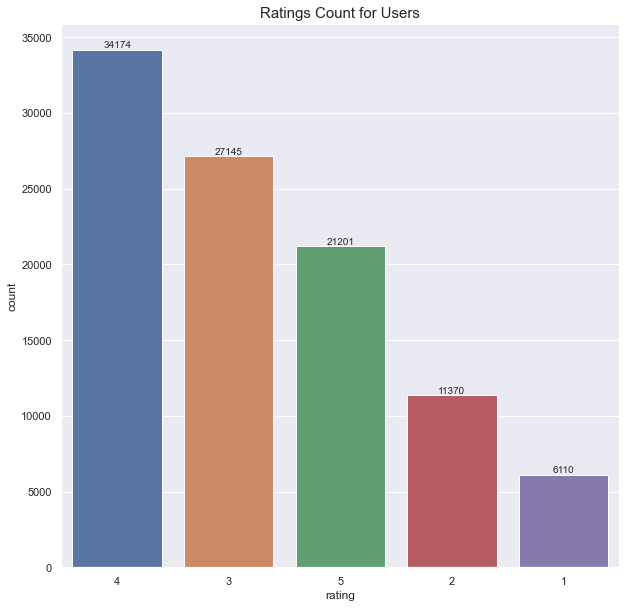

In [14]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df1, x='rating', order=df1['rating'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Ratings Count for Users', fontsize=15)

<AxesSubplot:xlabel='rating', ylabel='Count'>

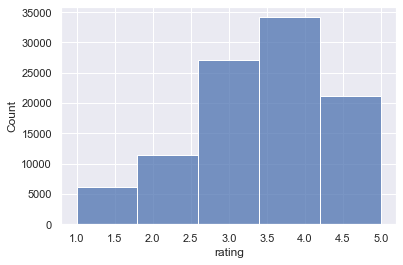

In [15]:
sns.histplot(df1['rating'], bins=5)

Text(0.5, 1.0, 'Count of User Age')

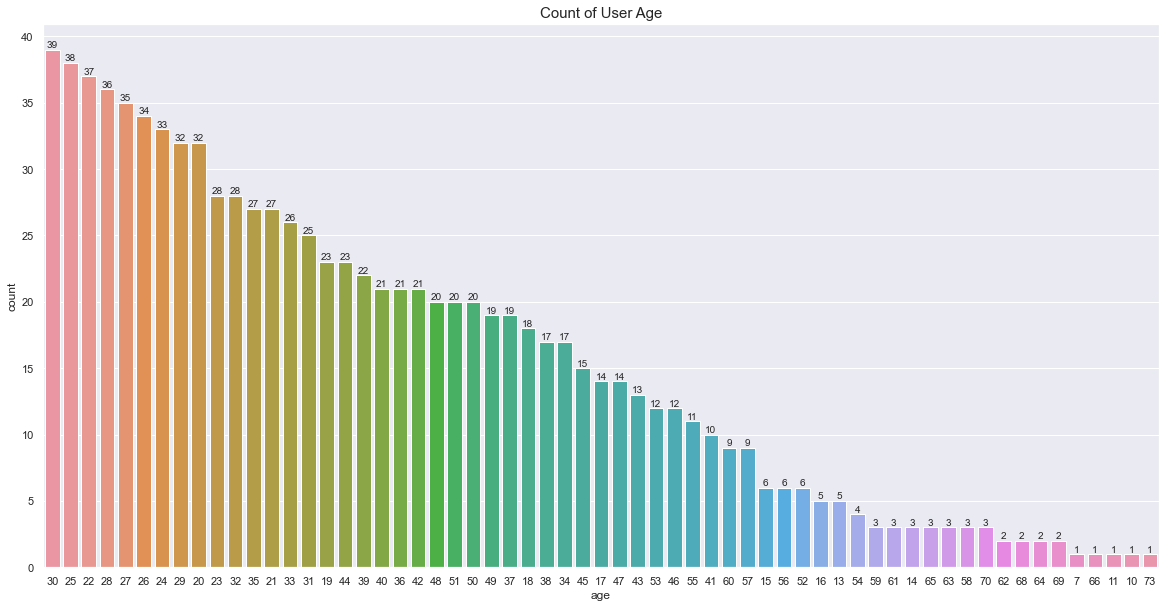

In [16]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df3, x='age', order=df3['age'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Count of User Age', fontsize=15)

<AxesSubplot:xlabel='age', ylabel='Count'>

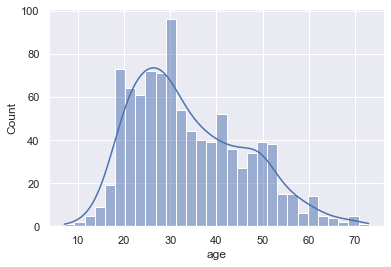

In [17]:
sns.histplot(df3['age'],bins=30,kde=True)

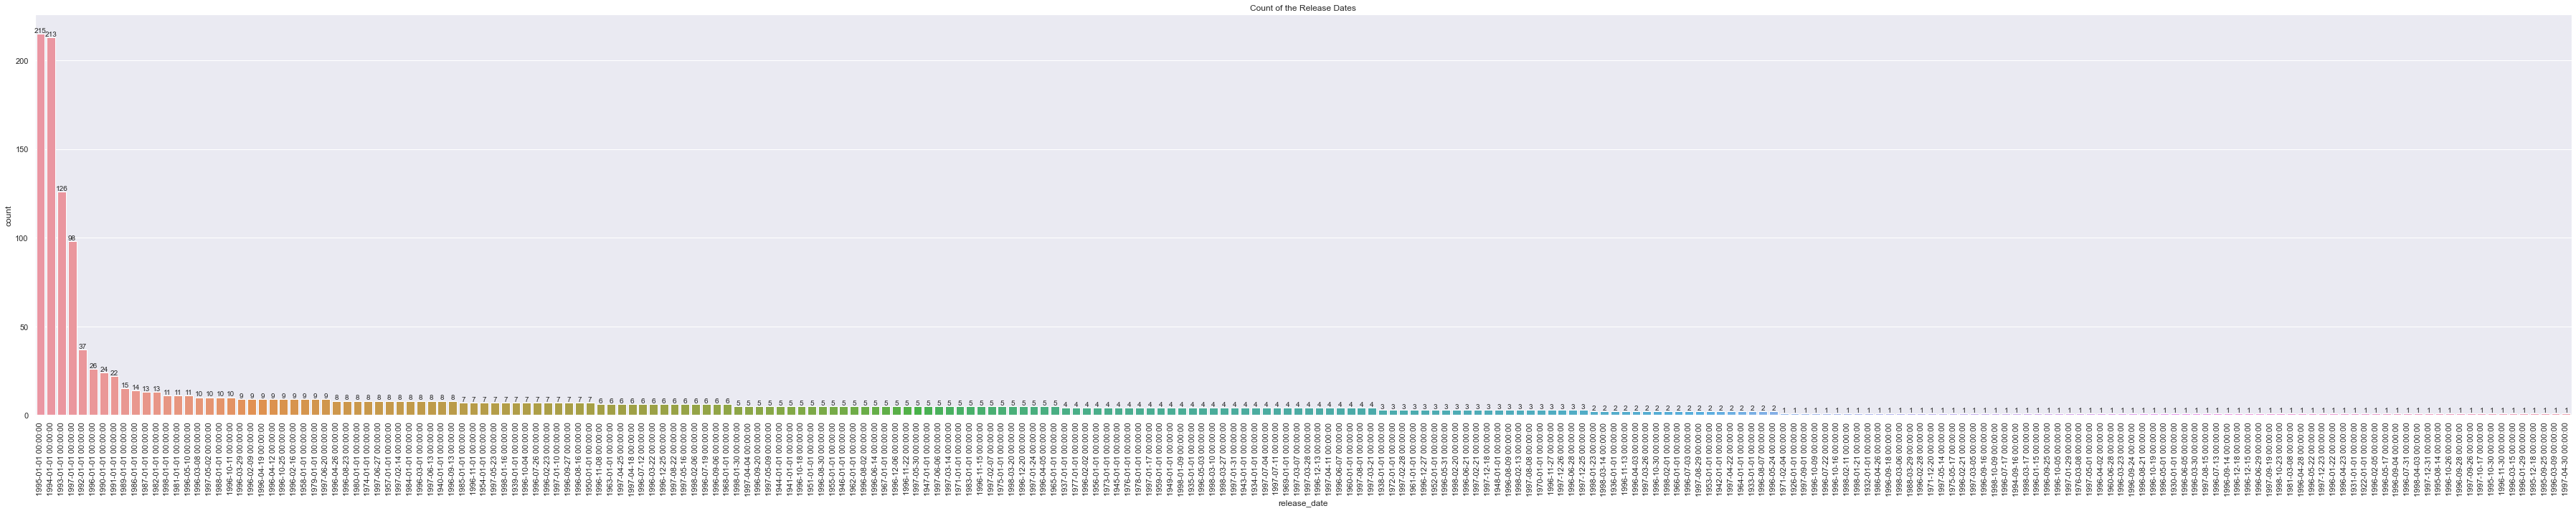

In [18]:
plt.figure(figsize=(50,10))
ax = sns.countplot(data=df2, x='release_date', order=df2['release_date'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.title('Count of the Release Dates')
plt.tight_layout()

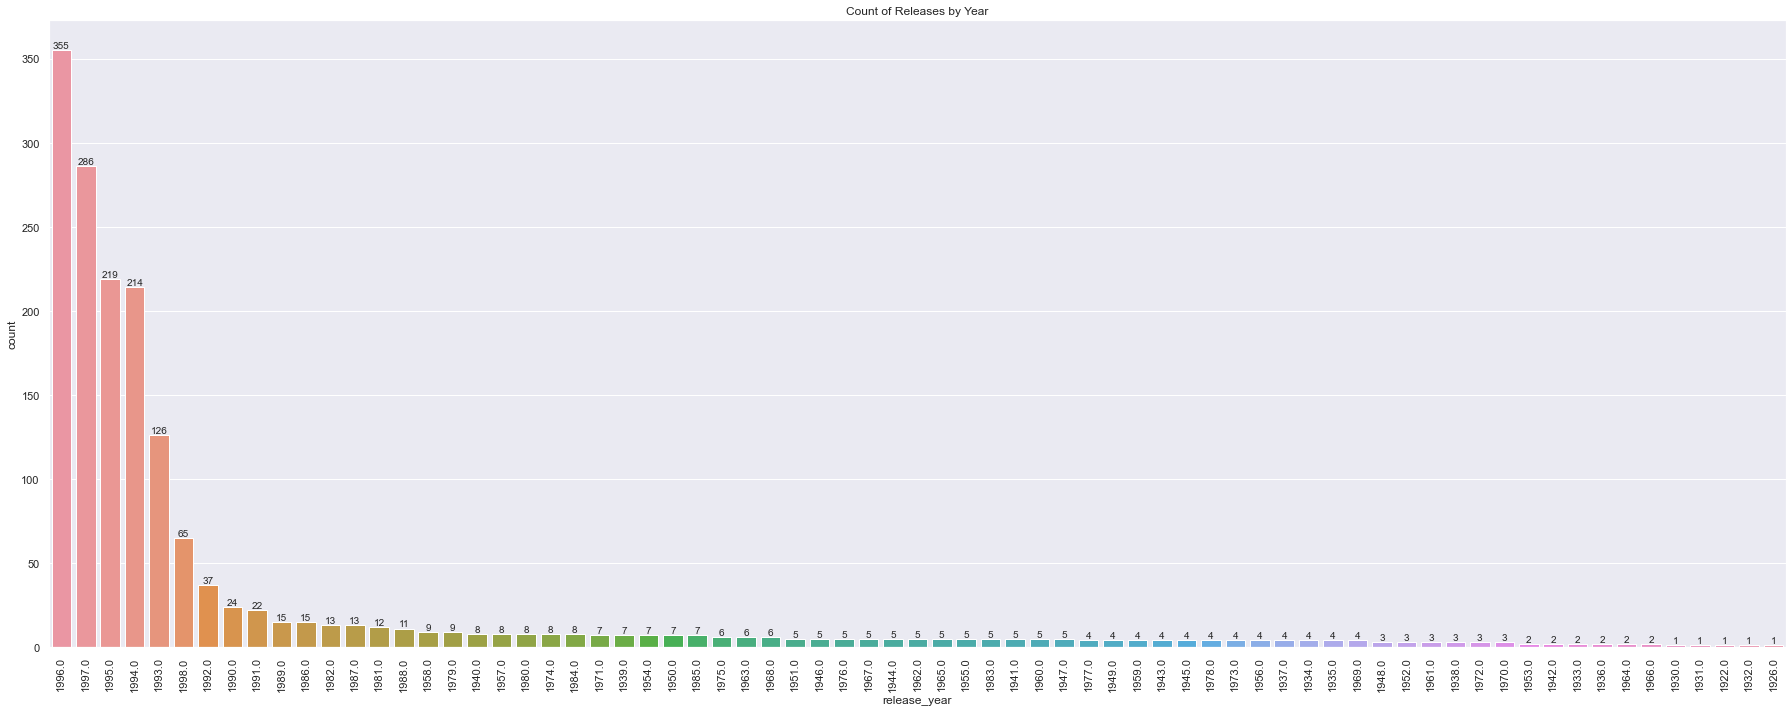

In [19]:
plt.figure(figsize=(25,10))
ax = sns.countplot(data=df2, x='release_year', order=df2['release_year'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.title('Count of Releases by Year')
plt.tight_layout()

Text(0.5, 1.0, 'Count of Gender')

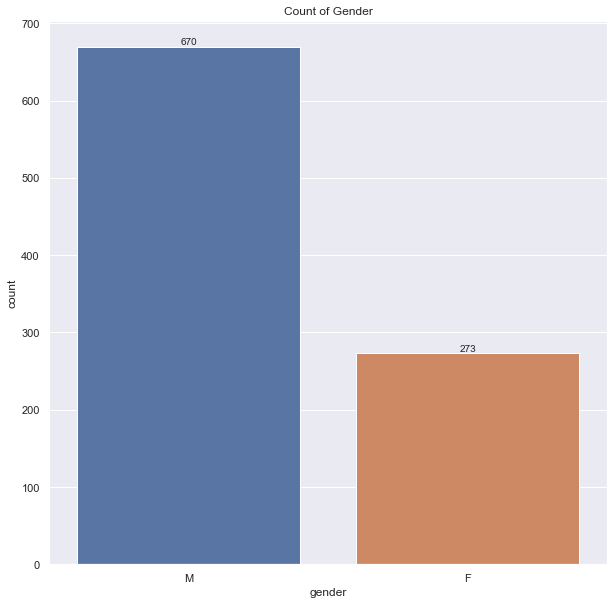

In [20]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df3, x='gender')
ax.bar_label(ax.containers[0])
plt.title('Count of Gender')

Text(0.5, 1.0, 'Count of Occupations')

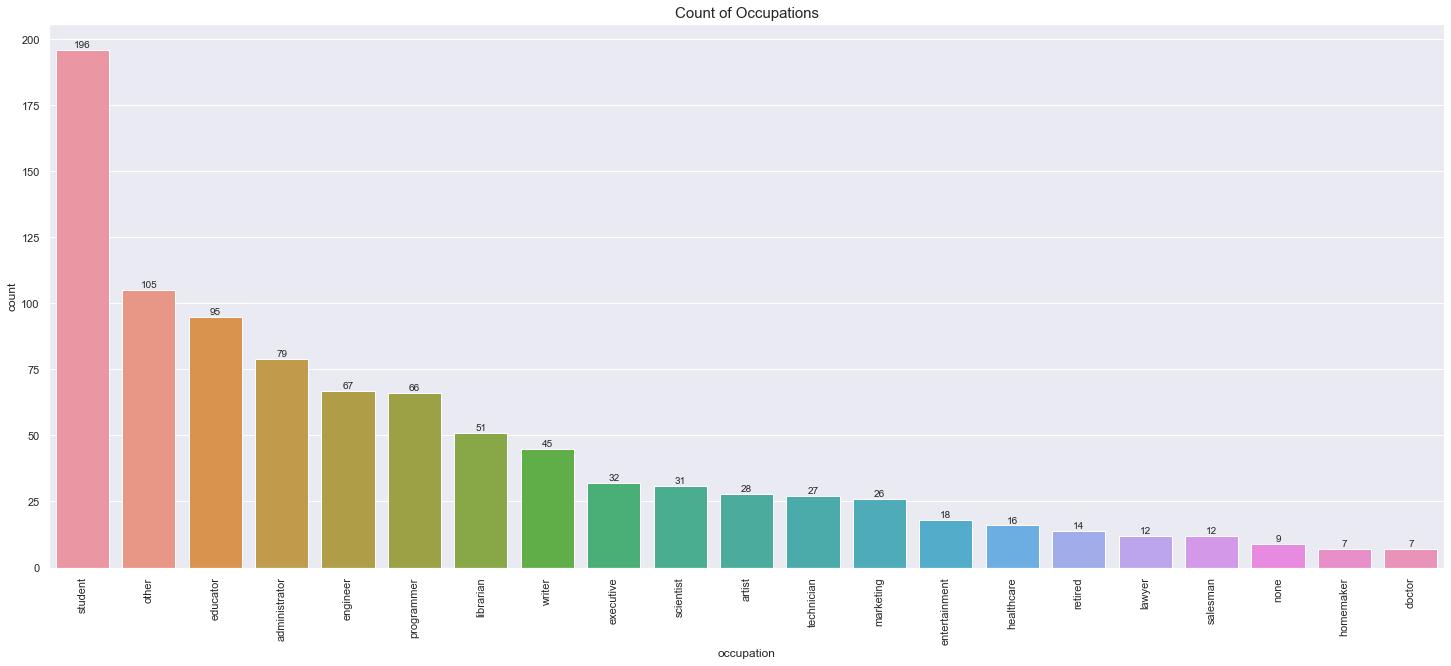

In [21]:
plt.figure(figsize=(25,10))
ax = sns.countplot(data=df3, x='occupation', order=df3['occupation'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.title('Count of Occupations', fontsize=15)

### Creating a matrix to examine the changes in movie genre preference over the years

In [22]:
genre_mat = df2.groupby('release_year').sum()
genre_mat = genre_mat.drop(['movie_id','video_release_date'], axis=1).T

In [23]:
genre_mat

release_year,1922.0,1926.0,1930.0,1931.0,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,...,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Children,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1


<AxesSubplot:xlabel='release_year'>

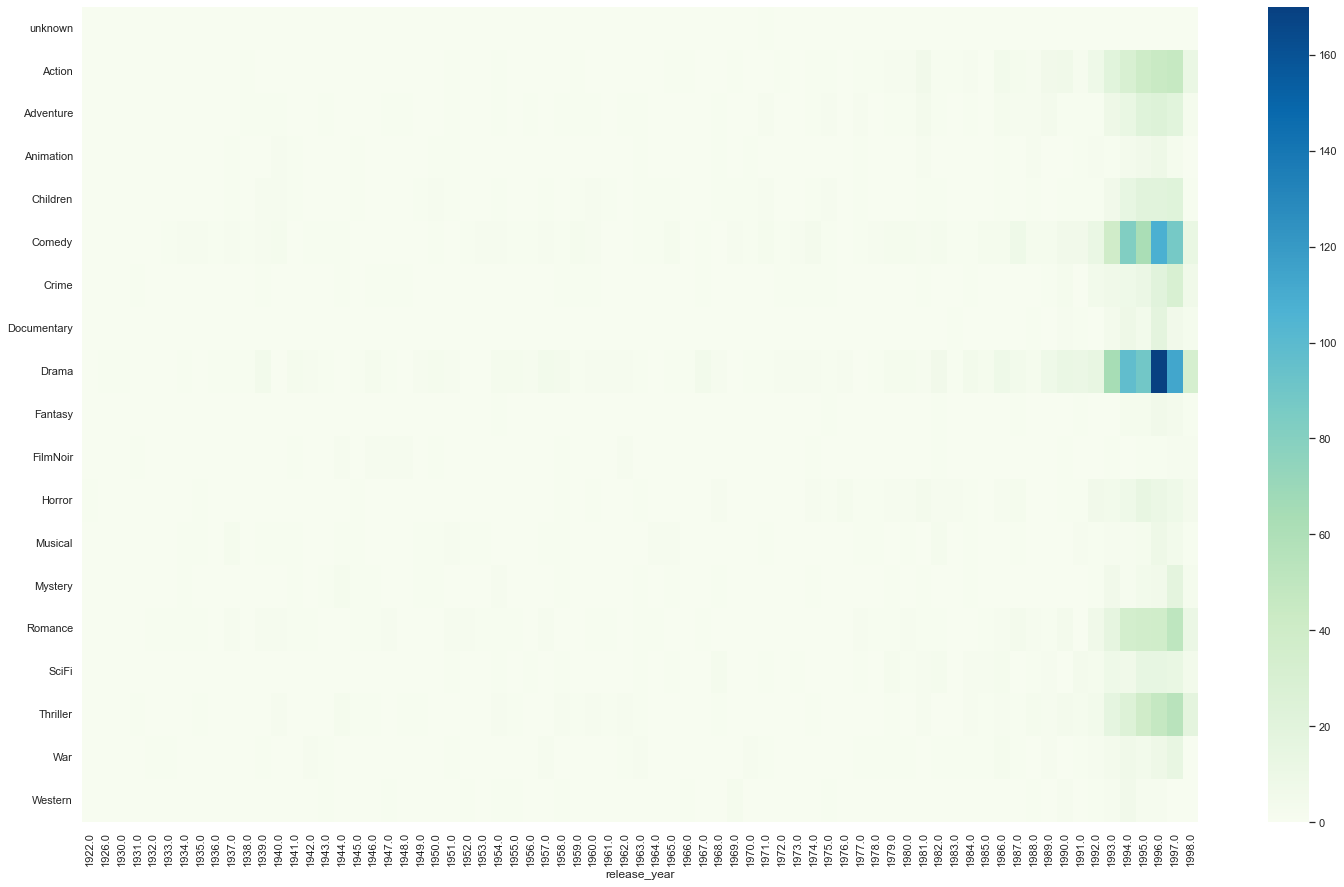

In [24]:
plt.figure(figsize=(25,15))
sns.heatmap(genre_mat, cmap='GnBu')

### Mapping Movie Title with Ratings from two different tables so we can explore top rated movies

In [25]:
df2_1 = df2[['movie_id','movie_title']]
df2_1.head()

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [26]:
df1_1 = df1[['item_id','rating']]
df1_1.columns = ['movie_id', 'rating']
df1_1.head()

,movie_id,rating
0,242,3
1,302,3
2,377,1
3,51,2
4,346,1


In [27]:
d1 = dict(zip(df2_1.movie_id,df2_1.movie_title))

In [28]:
df1_1['movie_id'] = df1_1['movie_id'].map(d1)

C:\Users\JB\AppData\Local\Temp\ipykernel_25704\2845434067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1['movie_id'] = df1_1['movie_id'].map(d1)


In [29]:
df1_4 = df1_1.value_counts()
df1_4 = pd.DataFrame(df1_4)
df1_4.reset_index(inplace=True)
df1_4.columns = ['title','rating','count']
df1_4

,title,rating,count
0,Star Wars (1977),5,325
1,Fargo (1996),5,227
2,"Godfather, The (1972)",5,214
3,Contact (1997),4,212
4,Return of the Jedi (1983),4,208
...,...,...,...
6657,"Inspector General, The (1949)",1,1
6658,"Inspector General, The (1949)",2,1
6659,"Invitation, The (Zaproszenie) (1986)",1,1
6660,It Could Happen to You (1994),1,1


In [30]:
df1_4[(df1_4['title'].str.contains('Star Wars'))]

,title,rating,count
0,Star Wars (1977),5,325
12,Star Wars (1977),4,176
402,Star Wars (1977),3,57
1718,Star Wars (1977),2,16
2637,Star Wars (1977),1,9


### Making a dataframe where movies have to have at least 100 ratings

In [31]:
df1_5 = df1_4[df1_4['count']>=100]
df1_5 = df1_5.sort_values(by='rating', ascending=False)
df1_5

,title,rating,count
0,Star Wars (1977),5,325
38,Braveheart (1995),5,134
22,"Shawshank Redemption, The (1994)",5,163
85,It's a Wonderful Life (1946),5,104
25,"Princess Bride, The (1987)",5,159
...,...,...,...
42,Air Force One (1997),3,128
71,Contact (1997),3,110
73,Star Trek: First Contact (1996),3,108
75,Independence Day (ID4) (1996),3,107


### Aggergating the ratings and total ratings count

In [32]:
df1_6 = df1_5.groupby('title').agg({'rating':'mean','count':'sum'}).sort_values(by='rating', ascending=False)
df1_6.reset_index(inplace=True)
df1_6

,title,rating,count
0,"Wizard of Oz, The (1939)",5.0,102
1,"Shawshank Redemption, The (1994)",5.0,163
2,It's a Wonderful Life (1946),5.0,104
3,"Princess Bride, The (1987)",5.0,159
4,Rear Window (1954),5.0,107
...,...,...,...
65,Liar Liar (1997),3.5,319
66,Star Trek: First Contact (1996),3.5,263
67,Independence Day (ID4) (1996),3.5,259
68,Scream (1996),3.5,305


Text(0.5, 1.0, 'Average Rating for Movies with at least 100 Ratings')

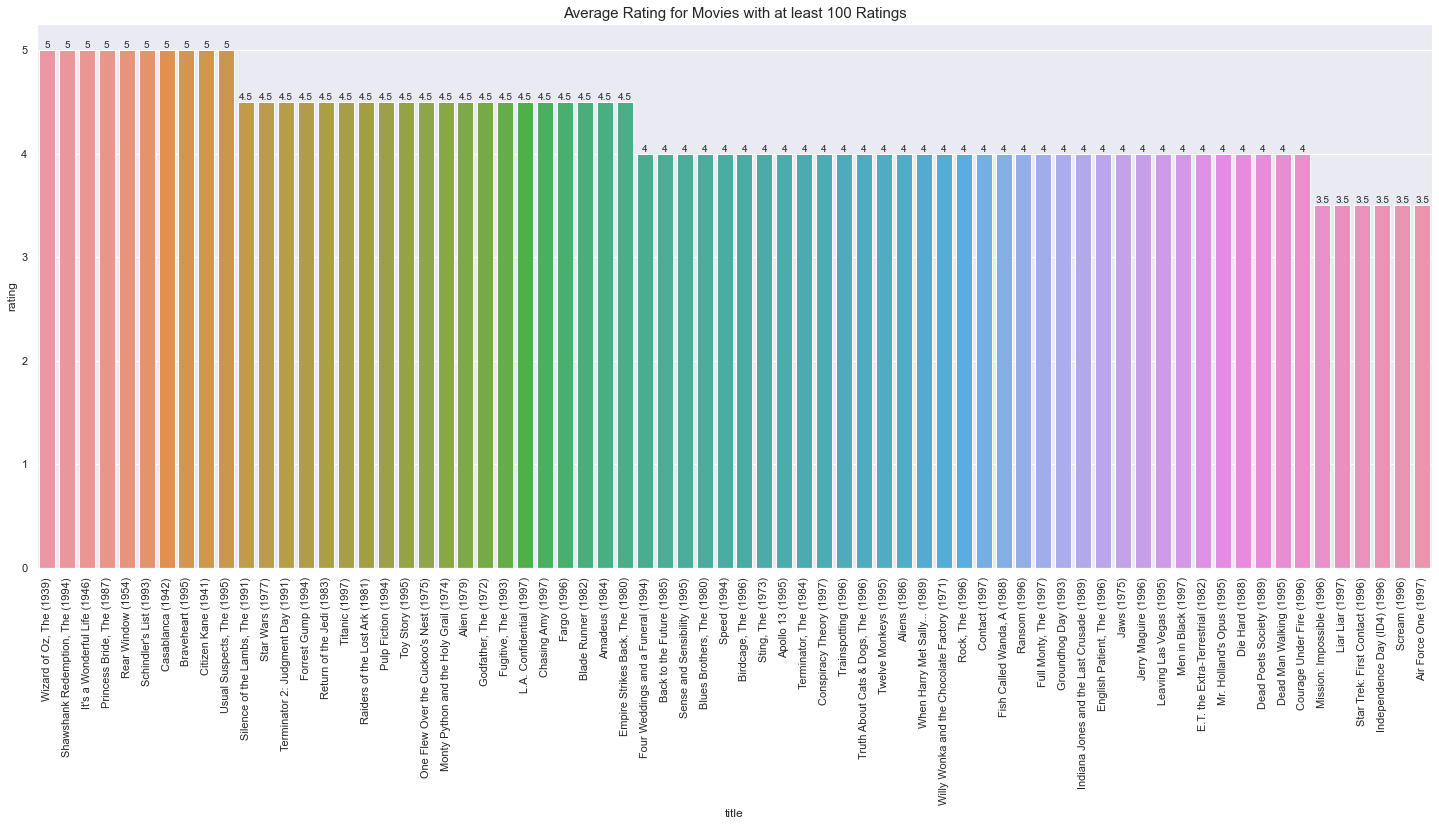

In [33]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data=df1_6, x='title',y='rating')
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.title('Average Rating for Movies with at least 100 Ratings', fontsize=15)


### Top 25 ratings

In [34]:
df1_7 = df1_6.head(25)
df1_7.head()

,title,rating,count
0,"Wizard of Oz, The (1939)",5.0,102
1,"Shawshank Redemption, The (1994)",5.0,163
2,It's a Wonderful Life (1946),5.0,104
3,"Princess Bride, The (1987)",5.0,159
4,Rear Window (1954),5.0,107


Text(0.5, 1.0, 'Top 25 Movies where they had at least 100 ratings')

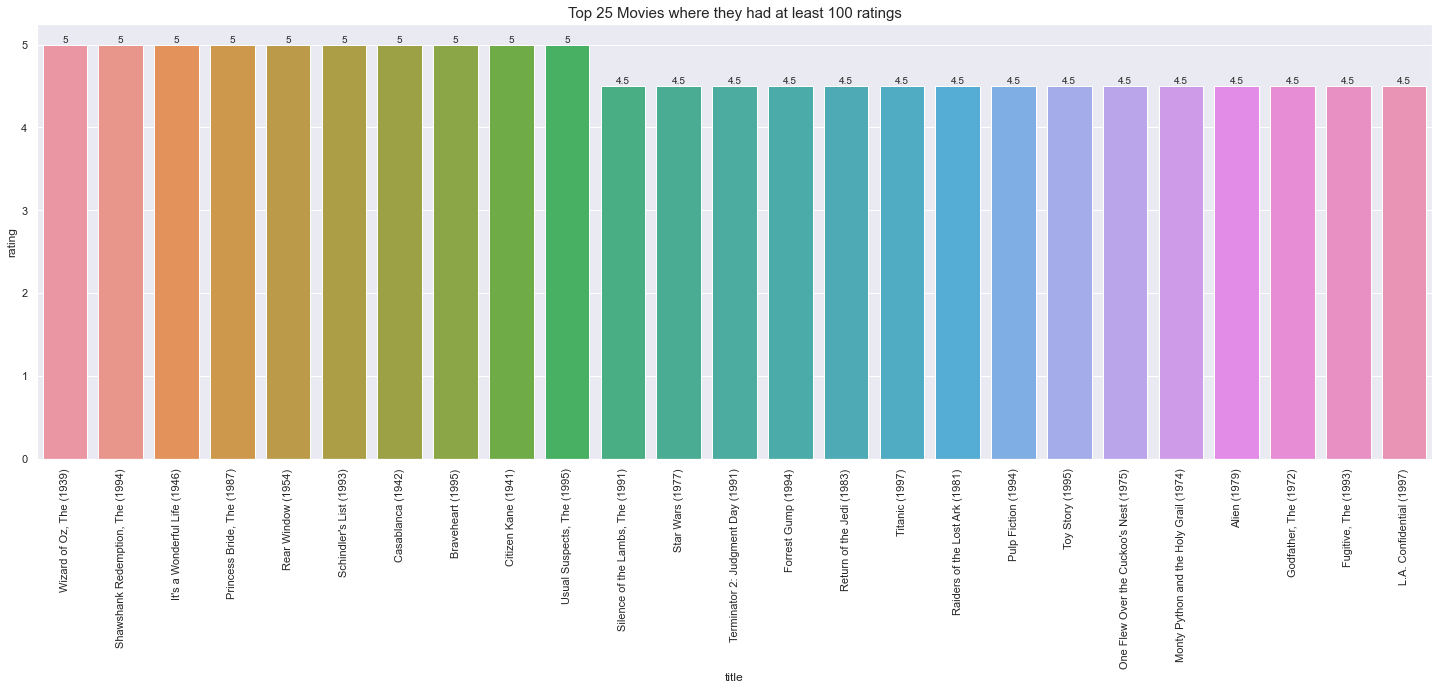

In [35]:
plt.figure(figsize=(25,8))
ax = sns.barplot(data=df1_7, x='title', y='rating')
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.title('Top 25 Movies where they had at least 100 ratings', fontsize=15)

### Preparing to merge data frames together to associate genre count by gender to assess genre preference by gender proportions

In [36]:
df3_1 = df3[['user_id','gender']]
df3_1.head()

,user_id,gender
0,1,M
1,2,F
2,3,M
3,4,M
4,5,F


In [37]:
df10 = df1[['user_id','item_id']]
df10.head()

,user_id,item_id
0,196,242
1,186,302
2,22,377
3,244,51
4,166,346


### Mapping gender to user_id

In [38]:
d2= dict(zip(df3_1['user_id'],df3_1['gender']))

In [39]:
df10['gender'] = df10['user_id']
df10['gender'] = df10['gender'].map(d2)
df10.columns = ['user_id', 'movie_id','gender']
df10.head()

C:\Users\JB\AppData\Local\Temp\ipykernel_25704\2271284208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['gender'] = df10['user_id']
C:\Users\JB\AppData\Local\Temp\ipykernel_25704\2271284208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['gender'] = df10['gender'].map(d2)


,user_id,movie_id,gender
0,196,242,M
1,186,302,F
2,22,377,M
3,244,51,M
4,166,346,M


In [40]:
df2_2 = df2.drop(['movie_title','release_date','video_release_date','IMDb_URL', 'unknown', 'release_year'], axis=1)
df2_2

,movie_id,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Joining tables

In [41]:
joined = pd.merge(df10, df2_2,how='left', on='movie_id')
joined

,user_id,movie_id,gender,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,196,242,M,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,F,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,M,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,M,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,M,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,M,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,716,204,F,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
99997,276,1090,M,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99998,13,225,M,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Aggergating and grouping by gender

In [42]:
joined_1 = joined.groupby('gender').sum()
joined_1 = joined_1.drop(['user_id','movie_id'],axis=1)
joined_1

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [43]:
joined_1['total'] = joined_1.sum(axis=1)
joined_1

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


### Creating proportions so that genres can be compared by gender proportions since there is not equal representation of gender in this dataset

In [44]:
joined_1p = joined_1.div(joined_1['total'], axis=0)
joined_1p

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,0.101339,0.058491,0.018529,0.041563,0.150239,0.033407,0.003482,0.204987,0.006760,0.007169,0.022290,0.026852,0.024469,0.109085,0.048956,0.094710,0.040763,0.006909,1.0
M,0.126803,0.066791,0.016427,0.031155,0.136980,0.039406,0.003594,0.181812,0.006225,0.008484,0.025931,0.022104,0.024741,0.085616,0.063575,0.105649,0.045373,0.009334,1.0


### Bar plots of gender proportions and genre.  Answer to questions at the end

In [45]:
joined_1.columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western', 'total'],
      dtype='object')

In [46]:
list_1 = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 
          'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']

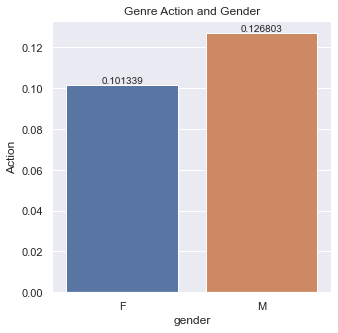

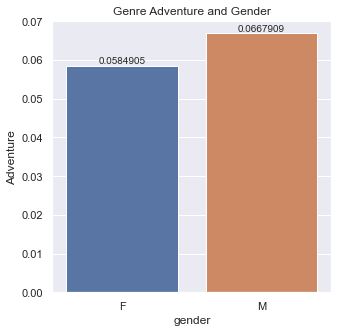

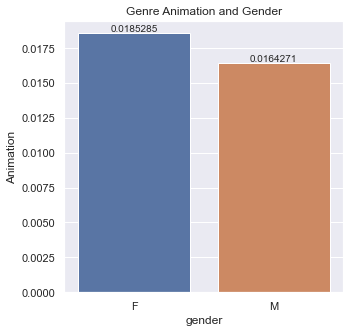

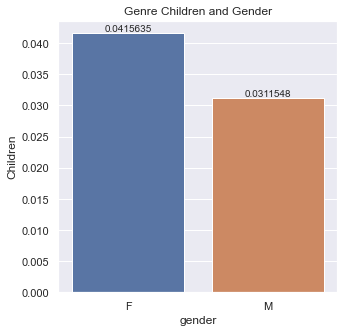

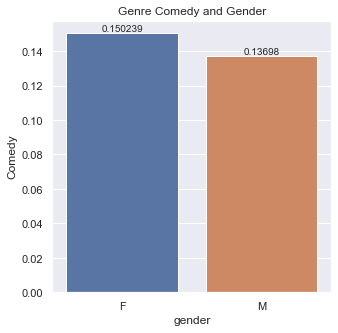

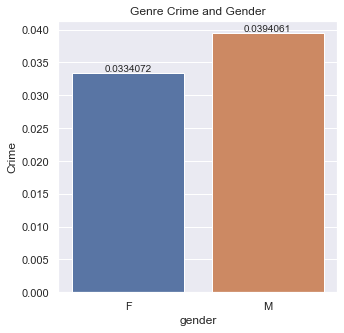

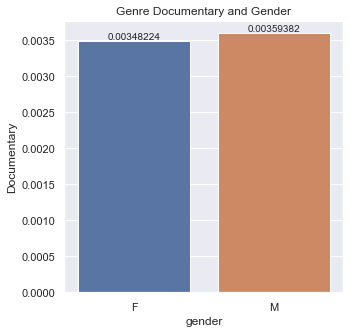

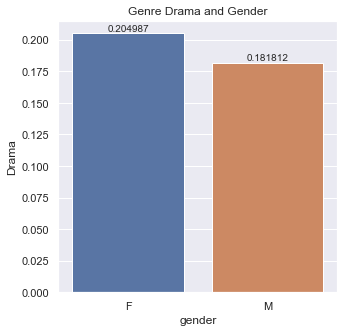

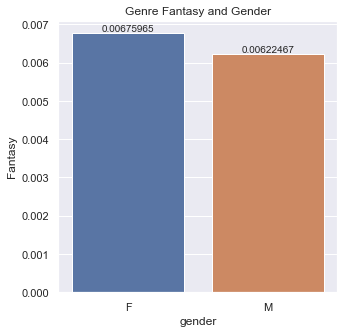

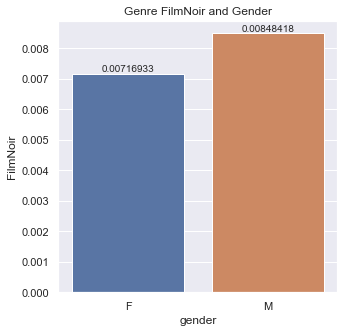

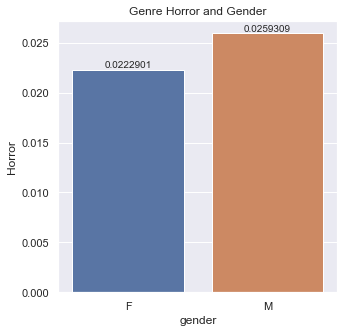

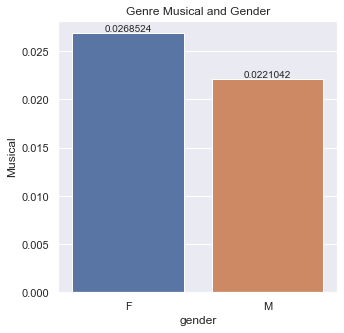

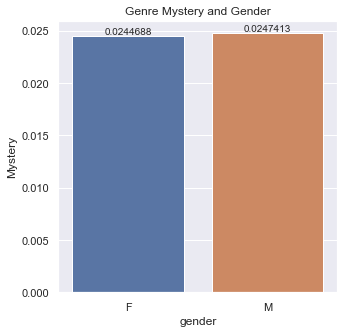

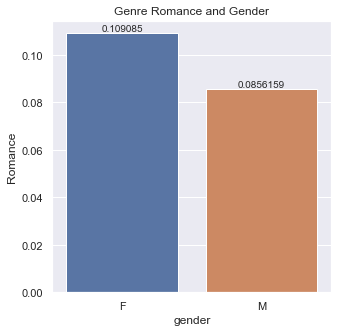

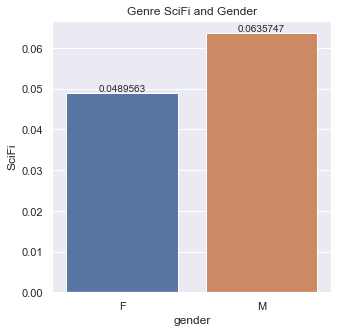

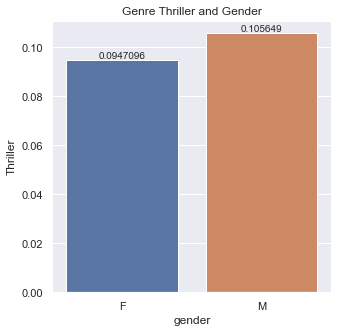

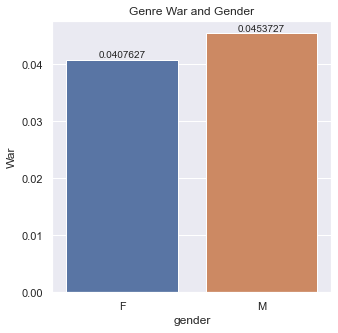

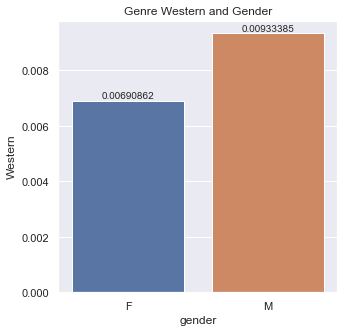

In [47]:
for i in list_1:
    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=joined_1p, x=joined_1p.index, y=i)
    ax.bar_label(ax.containers[0])
    plt.title('Genre '+i+' and Gender')

# Questions

**Determent if these statements are correct**<br>
Men watch more drama than women<br>
Men watch more Romance than women<br>
Women watch more Sci-Fi than men<br>

According to the proportion graphs above: Women watch more drama and romance movies. Men watch more Sci-Fi movies.